<a href="https://colab.research.google.com/github/ancha-mp/HSE_DL-17_Project/blob/main/20250715_%22Project_Music_genre_prediction%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Music genre prediction

**Описание задачи**

Вы сотрудник Отдела Data Science популярного музыкального стримингового сервиса. Сервис расширяет работу с новыми артистами и музыкантами, в связи с чем возникла задача -- **правильно классифицировать новые музыкальные треки**, чтобы улучшить работу рекомендательной системы. Ваши коллеги из отдела работы со звуком подготовили датасет, в котором собраны некоторые характеристики музыкальных произведений и их жанры. Ваша задача - разработать модель, позволяющую классифицировать музыкальные произведения по жанрам.

В ходе работы пройдите все основные этапы полноценного исследования:

*  загрузка и ознакомление с данными
*  предварительная обработка
*  полноценный разведочный анализ
*  разработка новых синтетических признаков
*  проверка на мультиколлинеарность
*  отбор финального набора обучающих признаков
*  выбор и обучение моделей
*  итоговая оценка качества предсказания лучшей модели
*  анализ важности ее признаков

**ВАЖНО**  
Необходимо реализовать решение с использованием технологии `pipeline` (из библиотеки `sklearn`)

**ОЖИДАЕМЫЙ РЕЗУЛЬТАТ**

* Оформленный репозиторий на GitHub (ноутбук с исследованием + код приложения)
* Развернутое web-приложение (с использованием библиотеки Streamlit)

## Участники проекта, репозиторий, приложение

Anna Fedorova

Natalia Logvinova

...

## Импорт библиотек, установка констант

In [1]:
%%capture
!pip install catboost -q

In [2]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from catboost import CatBoostClassifier

In [29]:
TRAIN = "https://www.dropbox.com/scl/fi/5zy935lqpaqr9lat76ung/music_genre_train.csv?rlkey=ccovu9ml8pfi9whk1ba26zdda&dl=1"
TEST = "https://www.dropbox.com/scl/fi/o6mvsowpp9r3k2lejuegt/music_genre_test.csv?rlkey=ac14ydue0rzlh880jwj3ebum4&dl=1"

In [30]:
RANDOM_STATE = 42
TEST_SIZE = 0.25

## Загрузка и обзор данных

In [31]:
train = pd.read_csv(TRAIN)
test = pd.read_csv(TEST)

In [32]:
train.sample(10)

,instance_id,track_name,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
1403,54766.0,Never Call Me (feat. YG) - Remix,0.694000,0.595,232240.0,0.4190,0.000000,D,0.1200,-8.122,Minor,0.2760,120.140,4-Apr,0.330,Rap
12267,81734.0,Re-Hash,0.027400,0.837,220840.0,0.7900,0.722000,G,0.0569,-6.717,Major,0.0933,100.293,4-Apr,0.782,Alternative
18982,84876.0,Where Were You Last Night,0.043300,0.578,267052.0,0.7770,0.000000,G#,0.2040,-3.679,Minor,0.2940,176.115,4-Apr,0.748,Blues
13949,81419.0,Stars Fell On Alabama,0.944000,0.309,215507.0,0.0724,0.000000,NaN,0.1560,-17.143,Major,0.0428,66.673,4-Apr,0.175,Blues
11150,23303.0,Vega - Kako to Mirai No Hokkyokusei,0.000390,0.428,299773.0,0.8340,0.000000,A,0.1220,-4.109,Minor,0.0453,151.812,4-Apr,0.551,Anime
638,82411.0,Little Red Wagon,0.029700,0.584,204387.0,0.8130,0.000197,F#,0.2720,-7.221,Major,0.0582,95.081,4-Apr,0.774,Country
17171,80032.0,Fr Fr (feat. Lil Skies),0.120000,0.916,195591.0,0.4930,0.000003,C#,0.2110,-7.371,Minor,0.1620,140.057,4-Apr,0.327,Rap
2453,86478.0,For Those About to Rock (We Salute You),0.000341,0.371,353693.0,0.9090,0.508000,E,0.0894,-5.704,Major,0.1010,132.864,4-Apr,0.480,Rock
2198,39191.0,Wine Me Up,0.133000,0.547,144120.0,0.2540,0.000082,A,0.2630,-16.548,Major,0.0461,139.650,4-Apr,0.903,Country
11359,55422.0,Nobody Praying For Me,0.003260,0.541,197800.0,0.9160,0.000002,G,0.0967,-5.964,Minor,0.0612,156.015,4-Apr,0.627,Rock


**Описание полей данных**

`instance_id` - уникальный идентификатор трека  
`track_name` - название трека  
`acousticness` - акустичность  
`danceability` - танцевальность  
`duration_ms` -продолжительность в милисекундах  
`energy` - энергичность  
`instrumentalness` - инструментальность  
`key` - тональность  
`liveness` - привлекательность  
`loudness` - громкость  
`mode` - наклонение  
`speechiness` - выразительность  
`tempo` - темп  
`obtained_date` - дата загрузки в сервис  
`valence` - привлекательность произведения для пользователей сервиса  
`music_genre` - музыкальный жанр

## Предварительная обработка данных

In [33]:
train.shape

(20394, 16)

In [34]:
test.shape

(5099, 15)

Информация о типах данных и пропусках

In [35]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20394 entries, 0 to 20393
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   instance_id       20394 non-null  float64
 1   track_name        20394 non-null  object 
 2   acousticness      20394 non-null  float64
 3   danceability      20394 non-null  float64
 4   duration_ms       20394 non-null  float64
 5   energy            20394 non-null  float64
 6   instrumentalness  20394 non-null  float64
 7   key               19659 non-null  object 
 8   liveness          20394 non-null  float64
 9   loudness          20394 non-null  float64
 10  mode              19888 non-null  object 
 11  speechiness       20394 non-null  float64
 12  tempo             19952 non-null  float64
 13  obtained_date     20394 non-null  object 
 14  valence           20394 non-null  float64
 15  music_genre       20394 non-null  object 
dtypes: float64(11), object(5)
memory usage: 

In [36]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5099 entries, 0 to 5098
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   instance_id       5099 non-null   int64  
 1   track_name        5099 non-null   object 
 2   acousticness      5099 non-null   float64
 3   danceability      5099 non-null   float64
 4   duration_ms       5099 non-null   float64
 5   energy            5099 non-null   float64
 6   instrumentalness  5099 non-null   float64
 7   key               4941 non-null   object 
 8   liveness          5099 non-null   float64
 9   loudness          5099 non-null   float64
 10  mode              4950 non-null   object 
 11  speechiness       5099 non-null   float64
 12  tempo             4978 non-null   float64
 13  obtained_date     5099 non-null   object 
 14  valence           5099 non-null   float64
dtypes: float64(10), int64(1), object(4)
memory usage: 597.7+ KB


итак имеем

Категориальные признаки: признаки, которые принимают значения из определенного набора категорий или классов. 2 признака: key, mode. Key можно закодировать, tempo принимает 3 значения: 1 - мажор, 2 - минор, 3 - неизвестно

Числовые признаки. Исследуем далее

Текстовые признаки: признаки, которые описывают текстовые данные. 1 признак track_name. Можем принять, что имя трека не влияют на прогноз мужыкального жанра.

Временные признаки: признаки, которые описывают данные, относящиеся ко времени. 1 признак obtained_date. Можем принять, что дата загрузки на сервис не влияют на прогноз мужыкального жанра.


3 поля с нулевыми значениями: key, mode, tempo -- эти признаки важны для предсказания жанра. Удалять нельзя.

y - object


Смотрим, какие значения принимает целевая переменная

In [37]:
#print(train['music_genre'].unique())

unique_genres = train['music_genre'].unique()
for i, genre in enumerate(unique_genres, 1):
    print(f"{i}. {genre}")

1. Country
2. Rock
3. Alternative
4. Hip-Hop
5. Blues
6. Jazz
7. Electronic
8. Anime
9. Rap
10. Classical


In [38]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
instance_id,20394.0,55973.846916,20695.792545,20011.00000,38157.25000,56030.000000,73912.750000,91758.000
acousticness,20394.0,0.274783,0.321643,0.00000,0.01520,0.120000,0.470000,0.996
danceability,20394.0,0.561983,0.171898,0.06000,0.45100,0.570000,0.683000,0.978
duration_ms,20394.0,220375.425272,126728.326142,-1.00000,177517.00000,219533.000000,266000.000000,4497994.000
energy,20394.0,0.625276,0.251238,0.00101,0.47000,0.666000,0.830000,0.999
instrumentalness,20394.0,0.159989,0.306503,0.00000,0.00000,0.000144,0.084475,0.996
liveness,20394.0,0.198540,0.166742,0.01360,0.09730,0.130000,0.253000,1.000
loudness,20394.0,-8.552998,5.499917,-44.40600,-10.25575,-7.052000,-5.054000,3.744
speechiness,20394.0,0.091352,0.097735,0.02230,0.03560,0.049050,0.095575,0.942
tempo,19952.0,120.942522,30.427590,34.76500,95.92175,120.012500,141.966250,220.041


In [39]:
train.duplicated().sum()

np.int64(0)

In [40]:
train[train.duplicated()]

,instance_id,track_name,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre


In [41]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5099 entries, 0 to 5098
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   instance_id       5099 non-null   int64  
 1   track_name        5099 non-null   object 
 2   acousticness      5099 non-null   float64
 3   danceability      5099 non-null   float64
 4   duration_ms       5099 non-null   float64
 5   energy            5099 non-null   float64
 6   instrumentalness  5099 non-null   float64
 7   key               4941 non-null   object 
 8   liveness          5099 non-null   float64
 9   loudness          5099 non-null   float64
 10  mode              4950 non-null   object 
 11  speechiness       5099 non-null   float64
 12  tempo             4978 non-null   float64
 13  obtained_date     5099 non-null   object 
 14  valence           5099 non-null   float64
dtypes: float64(10), int64(1), object(4)
memory usage: 597.7+ KB


In [42]:
test.duplicated().sum()

np.int64(0)

## Разведочный анализ

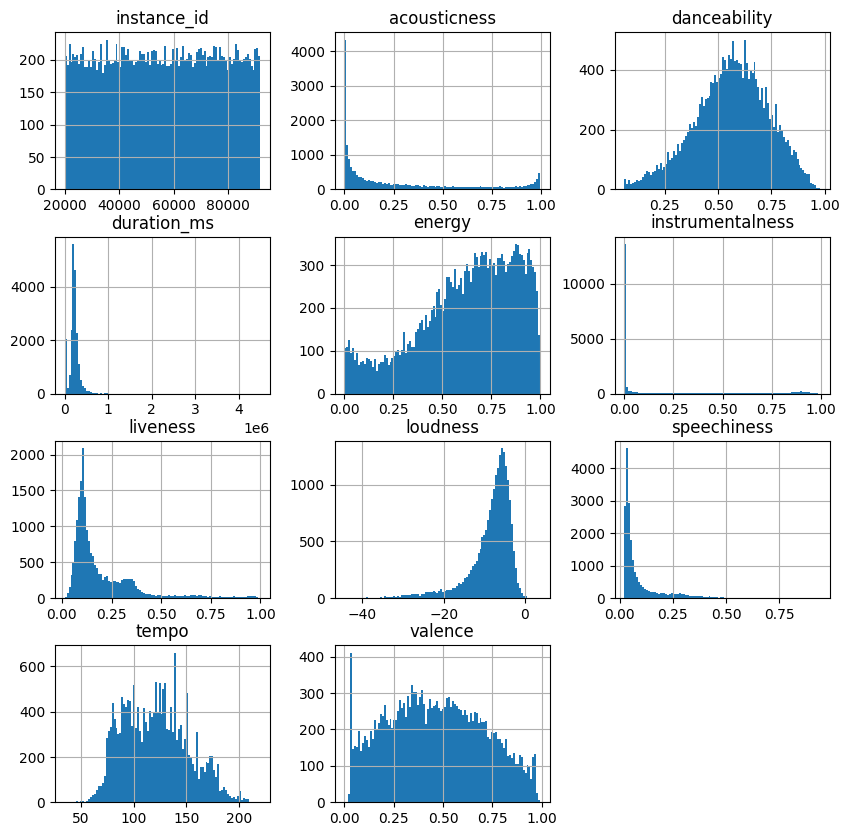

In [43]:
train.hist(bins=100, figsize=(10, 10));

Посмотрим как признаки,которые слабо распеределены по значениям, влияют на жанр

In [44]:
import matplotlib.pyplot as plt

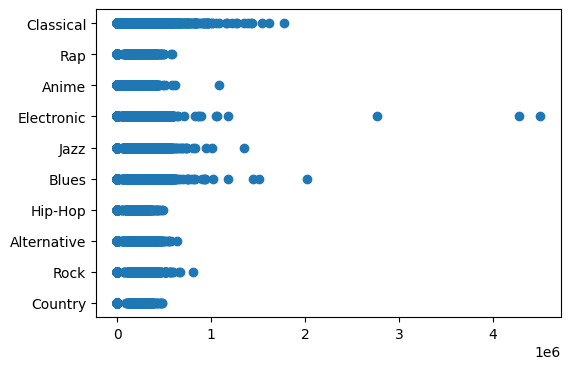

In [45]:
plt.figure(figsize=(6,4))

plt.scatter(train.duration_ms, train.music_genre);

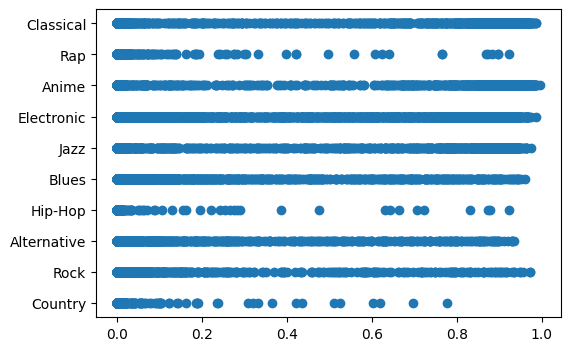

In [ ]:
plt.figure(figsize=(6,4))

plt.scatter(train.instrumentalness, train.music_genre);

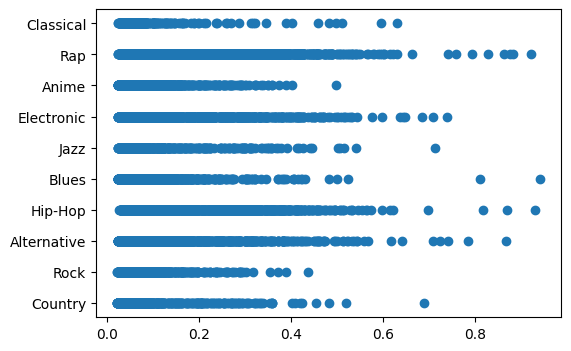

In [ ]:
plt.figure(figsize=(6,4))

plt.scatter(train.speechiness, train.music_genre);

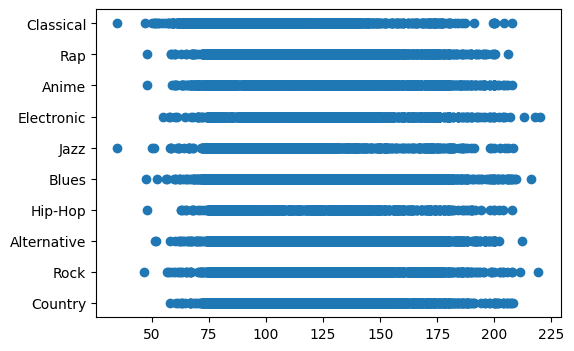

In [ ]:
plt.figure(figsize=(6,4))

plt.scatter(train.tempo, train.music_genre);

## Работа с признаками

1. Работа с пропущенными значениями

Стратегии заполнения пропусков:

если пропусков очень мало (~меньше процента) - строки с пропусками можно удалить или заполнить средним/медианой

если пропусков мало (~5-10%) - их можно заполнить (средним, медианой, уникальным значением, самым популярным значением, спрогнозировать)

если пропусков много - можно удалить столбец

можно пытаться предсказывать пропуски моделью





в наших данных в train и в test пропусков менее 5% данных в каждом из стобцов, всего данных достаточно для обучения, поэтому мы удаляем строки с пропусками

In [46]:
#AF: в каких столбцах есть пропуски в данных
train.isna().any()

,0
instance_id,False
track_name,False
acousticness,False
danceability,False
duration_ms,False
energy,False
instrumentalness,False
key,True
liveness,False
loudness,False


In [47]:
#AF: Посчитаем сколько пропусков в данных
train.isna().sum().sum()

np.int64(1683)

In [48]:
# AF сначала самый простой способ -- удаляем нулевые строки
train.dropna(inplace = True)
train.shape

(18754, 16)

ну... не много удалилось, датасет нормальный для обучения, считаем так

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18754 entries, 0 to 20393
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   instance_id       18754 non-null  float64
 1   track_name        18754 non-null  object 
 2   acousticness      18754 non-null  float64
 3   danceability      18754 non-null  float64
 4   duration_ms       18754 non-null  float64
 5   energy            18754 non-null  float64
 6   instrumentalness  18754 non-null  float64
 7   key               18754 non-null  object 
 8   liveness          18754 non-null  float64
 9   loudness          18754 non-null  float64
 10  mode              18754 non-null  object 
 11  speechiness       18754 non-null  float64
 12  tempo             18754 non-null  float64
 13  obtained_date     18754 non-null  object 
 14  valence           18754 non-null  float64
 15  music_genre       18754 non-null  object 
dtypes: float64(11), object(5)
memory usage: 2.4+ 

In [49]:
# AF сначала самый простой способ -- удаляем нулевые строки
test.dropna(inplace = True)
test.shape

(4681, 15)

Удаляем признаки, которые не влияют на предсказание obtained_date и track_name

In [50]:
train = train.drop(columns=["obtained_date", "track_name"])


In [51]:
test = test.drop(columns=["obtained_date", "track_name"])

In [52]:
train.sample(5)

,instance_id,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,music_genre
6024,76869.0,0.000135,0.677,259253.0,0.780,0.301000,G,0.111,-8.662,Major,0.0676,120.122,0.567,Alternative
18540,73118.0,0.004660,0.791,178286.0,0.921,0.057500,C#,0.369,-2.119,Minor,0.0741,139.969,0.626,Electronic
11996,30950.0,0.000636,0.384,180400.0,0.917,0.000044,A,0.409,-4.516,Minor,0.1940,79.478,0.443,Blues
339,55278.0,0.328000,0.783,160713.0,0.598,0.000000,A#,0.118,-10.590,Major,0.2920,97.011,0.452,Rap
258,85867.0,0.030900,0.331,159773.0,0.946,0.000006,G,0.254,-4.599,Major,0.0775,139.965,0.534,Rap


Категориальные признаки

NL: Закодируем все категориальные признаки через OHE

In [18]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop='first', sparse_output=False)
train_encoded = encoder.fit_transform(train[['key', 'mode']])
test_encoded = encoder.transform(test[['key', 'mode']])
ohe_columns = encoder.get_feature_names_out(['key', 'mode'])

ohe_train = pd.DataFrame(train_encoded, columns=ohe_columns, index=train.index)
ohe_test = pd.DataFrame(test_encoded, columns=ohe_columns, index=test.index)

In [19]:
num_features_train = train[['acousticness', 'danceability',	'duration_ms', 'energy',	'instrumentalness',	'liveness', 'loudness',	'speechiness',	'tempo', 'valence']].copy()
num_features_test = test[['acousticness', 'danceability',	'duration_ms', 'energy',	'instrumentalness',	'liveness', 'loudness',	'speechiness',	'tempo', 'valence']].copy()
train_final = pd.concat([num_features_train, ohe_train, train['music_genre']], axis = 1)
test_final = pd.concat([num_features_test, ohe_test], axis = 1)

NL: Стандартизируем все признаки

In [20]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numeric_cols = train_final.select_dtypes(include=['float64', 'int64']).columns
scaled = scaler.fit_transform(train_final.select_dtypes(include=['float64', 'int64']))
train_scaled = pd.concat([pd.DataFrame(scaled, columns=numeric_cols), train_final[['music_genre']]], axis = 1)

## Выбор и обучение моделей

In [53]:
y = train_final['music_genre']
X = train_final.drop(['music_genre'], axis = 1)

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


NL: Логистическая регрессия

In [28]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

pipeline_LogReg = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression())
])

pipeline_LogReg.fit(X_train, y_train)

y_pred = pipeline_LogReg.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.4214876033057851


AF: CatBoost

In [54]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

pipeline_CatBoost = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', CatBoostClassifier())
])

pipeline_CatBoost.fit(X_train, y_train)

y_pred = pipeline_CatBoost.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Learning rate set to 0.090847
0:	learn: 2.1916359	total: 51ms	remaining: 51s
1:	learn: 2.1179383	total: 99.9ms	remaining: 49.9s
2:	learn: 2.0550289	total: 146ms	remaining: 48.5s
3:	learn: 2.0001993	total: 192ms	remaining: 47.7s
4:	learn: 1.9531094	total: 239ms	remaining: 47.6s
5:	learn: 1.9123357	total: 286ms	remaining: 47.5s
6:	learn: 1.8777199	total: 331ms	remaining: 46.9s
7:	learn: 1.8442265	total: 379ms	remaining: 47s
8:	learn: 1.8162029	total: 423ms	remaining: 46.6s
9:	learn: 1.7926069	total: 472ms	remaining: 46.7s
10:	learn: 1.7696577	total: 517ms	remaining: 46.5s
11:	learn: 1.7497234	total: 567ms	remaining: 46.6s
12:	learn: 1.7316645	total: 622ms	remaining: 47.2s
13:	learn: 1.7157366	total: 683ms	remaining: 48.1s
14:	learn: 1.6979768	total: 727ms	remaining: 47.8s
15:	learn: 1.6828178	total: 774ms	remaining: 47.6s
16:	learn: 1.6678658	total: 821ms	remaining: 47.5s
17:	learn: 1.6530464	total: 866ms	remaining: 47.2s
18:	learn: 1.6393261	total: 914ms	remaining: 47.2s
19:	learn: 1.62

In [55]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import f1_score


# НАЧАЛО ВАШЕГО РЕШЕНИЯ
model = CatBoostClassifier(silent=True)
#raise NotImplementedError()

# КОНЕЦ ВАШЕГО РЕШЕНИЯ

# Определение параметров для GridSearchCV
"""
'n_estimators': [100, 200, 300]
Параметр 'n_estimators' определяет количество деревьев в ансамбле. Большее количество деревьев может
улучшить качество модели, но может также увеличить время обучения и инференса.

'max_depth': [3, 5, 10]
Параметр 'max_depth' определяет максимальную глубину дерева. Увеличение глубины дерева может привести к
более сложной модели, которая может переобучиться на тренировочных данных.

'learning_rate': [0.1, 0.01, 0.001]
Параметр 'learning_rate' определяет скорость обучения модели. Меньшие значения 'learning_rate' требуют
большего числа деревьев для достижения хорошей точности модели.

"""

# params = {
#     'n_estimators': [100, 200, 300],
#     'max_depth': [3, 5, 10],
#     'learning_rate': [0.1, 0.01, 0.001]
# }
params = {
    'n_estimators': [30, 50, 100],
    'max_depth': [3, 5],
    'learning_rate': [0.1, 0.01]
}

# Создание объекта GridSearchCV
"""
Задание 2.14 (1 балл)
Сохраните в переменную grid_search экземпляр класса GridSearchCV со следующими параметрами:
estimator=model
param_grid=params
scoring='f1_macro'
Пример:
var = GridSearchCV(par1=value1, par2=value2, par3=value3)
"""
# НАЧАЛО ВАШЕГО РЕШЕНИЯ
grid_search = GridSearchCV(estimator=model, param_grid=params, scoring='f1_macro')
#raise NotImplementedError()

# КОНЕЦ ВАШЕГО РЕШЕНИЯ

# Обучение модели на обучающих данных
grid_search.fit(X_train, y_train)

# Получение лучшей модели
best_model = grid_search.best_estimator_

# Предсказание на тестовых данных
y_pred = best_model.predict(X_test)

# Получение лучших параметров CatBoostClassifier
CatBoostClassifier_best_params = grid_search.best_params_
print("CatBoostClassifier_best_params: ", CatBoostClassifier_best_params)

# Вычисление F1-меры
CatBoostClassifier_f1 = f1_score(y_test, y_pred, average='macro')
print("CatBoostClassifier_f1: ", CatBoostClassifier_f1)

CatBoostClassifier_best_params:  {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}
CatBoostClassifier_f1:  0.41867485698065937


## Оценка качества

## Анализ важности признаков модели